In [1]:
from modeloMultiplo import MRLM
from scipy.stats import zscore
import pandas as pd
import numpy as np

Aqui carregamso o dataset

In [2]:
df = pd.read_excel("dados_projeto.xlsx")
df

,Investimento_marketing,alcance_midias,cliques,taxa_conversao,taxa_ocupacao_hoteleira,estacao,tipo_destino,orcamento_publico,preco_medio_pacote,reputacao_online,eventos_anuais
0,319.24,27.89,23.19,8.04,64.7,Media,Praia,85.8,3.84,3.58,2.0
1,274.77,21.66,16.70,7.80,70.5,Alta,NaN,42.1,2.50,5.00,1.0
2,195.16,19.56,9.79,8.35,69.9,Media,Urbano,52.6,1.92,1.84,3.0
3,310.48,31.94,26.59,6.54,57.3,Alta,Campo,53.1,3.93,4.97,7.0
4,241.81,28.98,22.75,8.30,61.4,Alta,Urbano,43.6,5.85,4.26,1.0
...,...,...,...,...,...,...,...,...,...,...,...
895,275.19,36.82,31.79,6.98,64.0,Media,Praia,63.7,4.08,4.29,1.0
896,282.17,22.13,16.75,2.07,71.5,Media,Urbano,93.6,4.09,2.50,2.0
897,230.21,19.35,11.86,7.94,70.2,Media,Urbano,33.2,2.82,5.00,3.0
898,207.22,17.57,17.72,5.13,66.4,Media,Urbano,58.4,1.48,4.53,4.0


Chamamos de dummies as variáveis categóricas que serão convertidas para várias colunas com 0's e 1's

Aqui transformamos os dummies mas não removemos linhas com valores negativos (aparentemente nenhum dado pode ser negativo) nem valores nulos pois, uma coluna específica contem null ou contém valores negativos mas, podemos perder informações de outras colunas se excluirmos essa coluna num futuro tratamento de variáveis. Então o próprio modelo vai fazer essa remoção.



In [3]:
dummies = ["estacao", "tipo_destino"]
df = pd.get_dummies(df, columns=dummies, drop_first=True)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [4]:
df

,Investimento_marketing,alcance_midias,cliques,taxa_conversao,taxa_ocupacao_hoteleira,orcamento_publico,preco_medio_pacote,reputacao_online,eventos_anuais,estacao_Baixa,estacao_Media,tipo_destino_Cultural,tipo_destino_Praia,tipo_destino_Urbano
0,319.24,27.89,23.19,8.04,64.7,85.8,3.84,3.58,2.0,0,1,0,1,0
1,274.77,21.66,16.70,7.80,70.5,42.1,2.50,5.00,1.0,0,0,0,0,0
2,195.16,19.56,9.79,8.35,69.9,52.6,1.92,1.84,3.0,0,1,0,0,1
3,310.48,31.94,26.59,6.54,57.3,53.1,3.93,4.97,7.0,0,0,0,0,0
4,241.81,28.98,22.75,8.30,61.4,43.6,5.85,4.26,1.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,275.19,36.82,31.79,6.98,64.0,63.7,4.08,4.29,1.0,0,1,0,1,0
896,282.17,22.13,16.75,2.07,71.5,93.6,4.09,2.50,2.0,0,1,0,0,1
897,230.21,19.35,11.86,7.94,70.2,33.2,2.82,5.00,3.0,0,1,0,0,1
898,207.22,17.57,17.72,5.13,66.4,58.4,1.48,4.53,4.0,0,1,0,0,1


Extraímos da base de dados a coluna que possui a variável a ser explicada y das outras variáveis então temos y = Investimentos e X = outras

In [5]:
y_label = "Investimento_marketing"

y = df[y_label]
X = df.drop(columns=y_label)

Aqui criamos um modelo de regressão linear Multiplo
Especificamos quem serão X e y, quais os nomes de X e y para plots e quem são os dummies para melhorias futuras

In [6]:
modelo = MRLM(X, y, X.columns.to_list(), y.name, dummies)

Sumário do modelo criado

In [7]:
modelo.sumario_sm()

                              OLS Regression Results                              
Dep. Variable:     Investimento_marketing   R-squared:                       0.231
Model:                                OLS   Adj. R-squared:                  0.217
Method:                     Least Squares   F-statistic:                     16.31
Date:                    Wed, 24 Sep 2025   Prob (F-statistic):           6.98e-33
Time:                            17:33:33   Log-Likelihood:                -3635.8
No. Observations:                     720   AIC:                             7300.
Df Residuals:                         706   BIC:                             7364.
Df Model:                              13                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

"selecionar_melhor_combinacao_de_variaveis" é o algoritmo que identifica a melhor combinação com base num critério informado. 
"modelo_melhorado" é o modelo ja ajustado com certas colunas removidas (ou não)

In [8]:
modelo_melhorado = modelo.selecionar_melhor_combinacao_de_variaveis(criterio="R2_aj")

1023 / 1023 considerando R2_AJ    


In [9]:
modelo_melhorado.sumario_sm()

                              OLS Regression Results                              
Dep. Variable:     Investimento_marketing   R-squared:                       0.229
Model:                                OLS   Adj. R-squared:                  0.219
Method:                     Least Squares   F-statistic:                     22.47
Date:                    Wed, 24 Sep 2025   Prob (F-statistic):           4.83e-37
Time:                            17:33:49   Log-Likelihood:                -3871.2
No. Observations:                     766   AIC:                             7764.
Df Residuals:                         755   BIC:                             7815.
Df Model:                              10                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

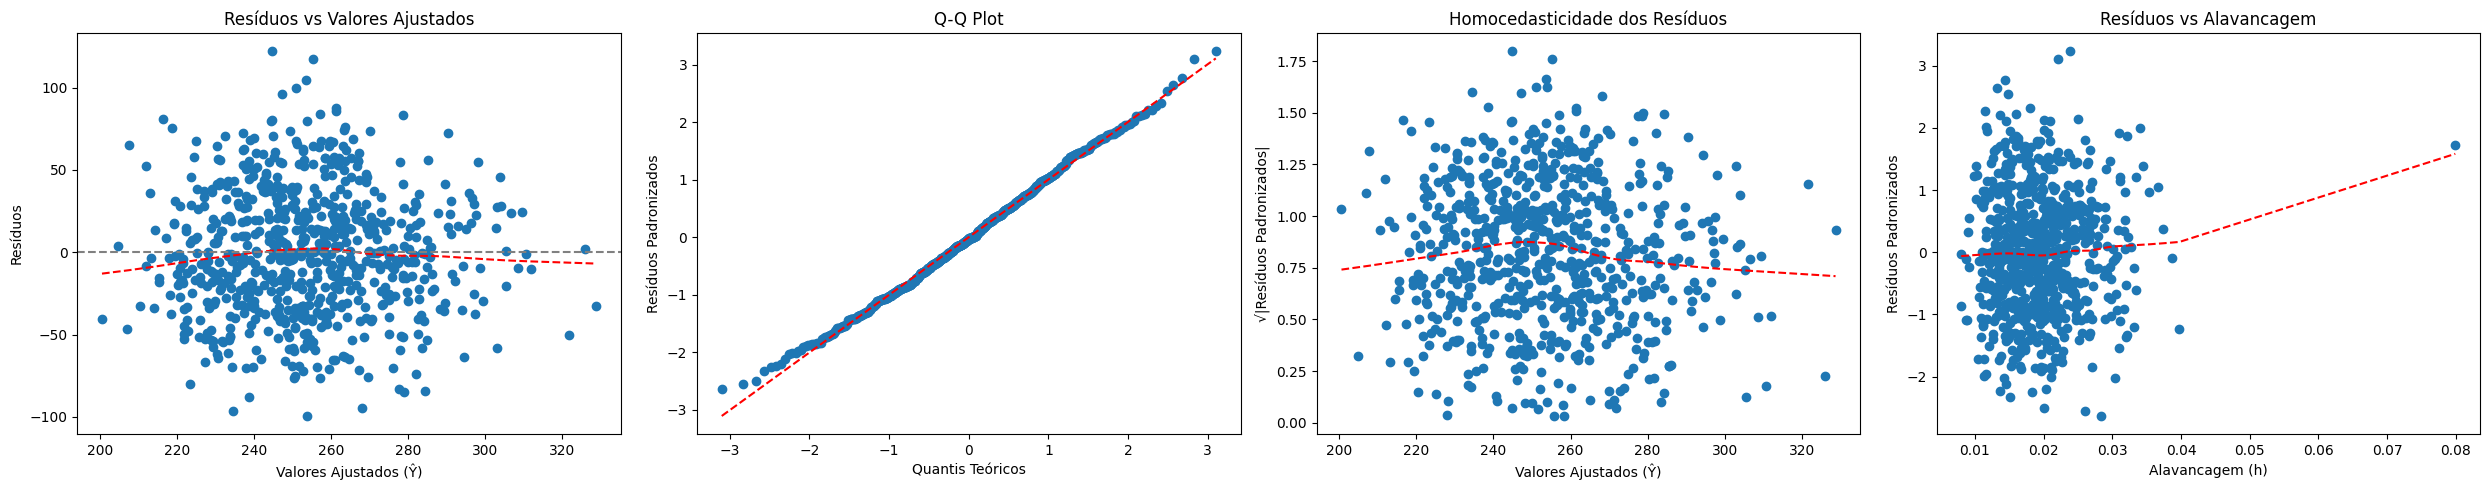

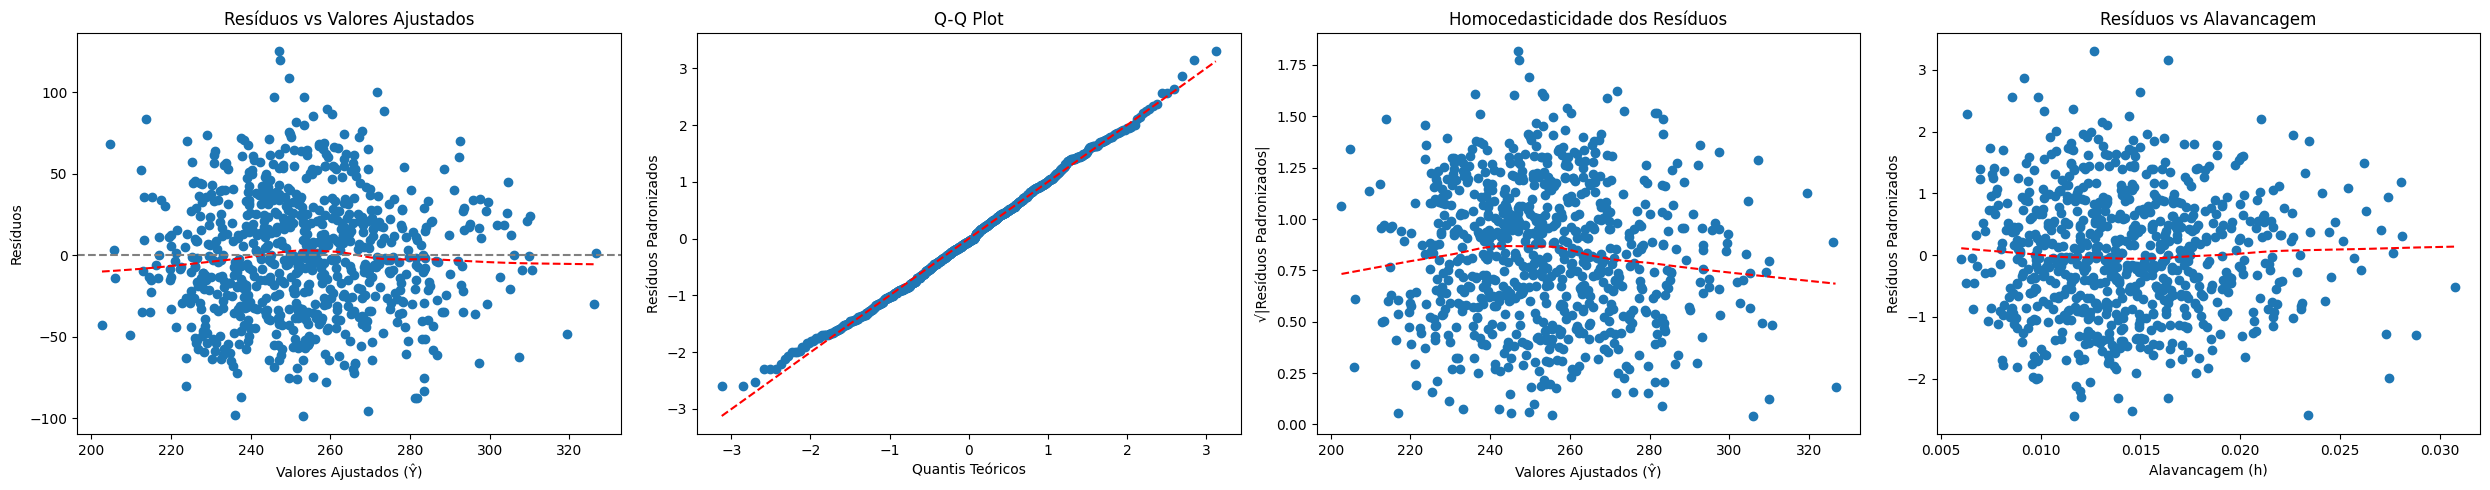

In [10]:
modelo.residual_plots()
modelo_melhorado.residual_plots()

In [11]:
modelo_melhorado.previsao_para_media_y()

ValueError: shapes (2,10) and (11,) not aligned: 10 (dim 1) != 11 (dim 0)

In [ ]:
modelo_melhorado.previsao_para_n_observacoes_aleatorias()